# Milestone 3

Stephanie Eordanidis.
Ravjot Sachdev,
Jackson Taber

Syracuse University : College of Engineering & Computer Science

223 Link Hall, Syracuse, NY 13244

sleordan@syr.edu, rssachde@syr.edu, jrtaber@syr.edu

CIS 700 Machine Learning and Security

06/16/2021


## Theme:
 “Adversarial Text Generation: Adversarial Machine Learning Applications in Text Analysis”

## Purpose:
The purpose of this lab is to add three new GAN metrics to the project space and successfully run them on the chosen GAN models from previous milestones.

## Project:
Texygen is the name of the project selected. This project is a benchmarking tool that aids in text generation model research and testing. This tool allows for ease of various model testing to compare accuracy and synthetic data generation of models using same training baseline.

## (Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700/

## Resources:
**Original Source:** 		https://github.com/geek-ai/Texygen

**Modified Sources Acquired:** 	2SU Course Files Section -> Texygenmaster_Python_3.6.zip

## Data:
The data for the selected project is setup as follows:

•	Generated data training: 5000 word and 20 sentence count

•	Oracle data generation: 10,000 sentence generation

•	Real data training:


*   image_coco : 20,000 sentences chosen from the image
 *   COCO captions data. 10,000 of which are used as training set while other 10,000 used as test set
*   emlp_news_min : 20,000 sentences
 *  A minified version of emlp_news : reduced from 278,586 lines of text in training data to 10,000 and also 10,000 for test. Trying to run real training on 1/4 of a million lines proved too taxing even on colab pro. minified version should yeild decent results comparable to image_coco, the project default.
*   eapoe : 266 sentences
 *  eapoe : 266 sentences Compiled from various Edgar Allan Po Poems found on referenced poem sight  [4].

## Modifications:
 To begin, the modified source code acquired from the 2SU application was further modified to combine the original intention of the origin source authors as well as professor modification. If no arguments are passed, all models/data are run.
 > **Note**: The order or model generation is done by first iterating over the GAN model type, then data type. If arguments are passed, those arguments will be validated and run accordingly to run a more targeted model test.

 Modifications were applied to eliminate much library warnings and informational messages as to keep output as clean as possible. File path naming was updated to be compliant with Google Colaboratory environment. All epoch time elapse console printing has been commented out for cleaner output reading.

 **Modifications under previous course works:**
* Addition of three new GAN models
    * CGAN
    * InfoGAN
    * DCGAN

* Fixed LeakGAN project to work and run properly by setting standardized default flag attributes in main.py
* Update models to save off test files for each training type run (ie oracle, cfg, real)
* Updated models to use unified naming schema for test files, with model as the model the file was generated for and training as the training the data was generated from

    **Example:** 
    * experiment-log-model-training.csv
    * oracle-model-training.txt
    * generator-model-training.txt
    * test_file-model-training.txt

* Updated models to set file name in main.py on the GAN model directly instead of in each model file themselves
* Added additional field called 'log_file' to be the name for the experiment-log file data
* Update to add new dir for midterm content vs milestone project
* Added new util called visual.py to handle data representation
* Allow visual.py to take directory param. if none exist, default to /content/CIS-700_clone/results
* Updated visual.py to grab files from directory and generate visual data representations from relevant files in a more automated and less hard coded way
* Allow main.py to take a results output directory via arg -o, if arg not present sets to results/
* Allow main.py to take value for epoch via -p arg to use in model training
* For argument provided training, added more detailed messaging as well as metric grid showing metrics that will be used during model generation
* Cleaned main.py and model files to limit print to console, additionally console print is uniform and consistent across. 
* Added time elapsed pring statement for model run.

**Modifications under this work:**
* Addition of three new metrics:
    * Time Elapse Interval (TEI)
        TEI measures time elapse for the model per epoch run. Used to measure average time efficiency to run model for each training during epochs. Helps gauge run time during various model training components (ie pre training and adversarial training)
    * Metric 2
    * Metric 3



## Setup:
Due to the heft of processor/gpu usage, it was deemed necessary to run the project in the Google Colaboratory. Original attempt to run was done via Pycharm IDE Professional Edition with Anaconda derived environments, however this proved too great of a strain on the accessible workstation.

Additionally, it is important to note if timeout is experienced, it is possible to run a ClickConnect script via inspector tools to prevent timeout while running long codes. The following code worked in chrome when inserted in the developer console at time of test:

> 
```
let myClick = function ClickConnect({
console.log('Working - Preventing Timeout'); 
document.querySelector('colab-connect-button').shadowRoot.getElementById('connect').click(); 
}
setInterval(myClick,60000);
```

### Step 1
A new Google Colaboratory workspace was setup, titled “Milestone2”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to sync the colab workspace the github repository files as follows

```
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700_clone/
```

Running this command from the first cell in the workbook syncs the drive to the github repo location of project location, as well as change to the necessary directory

In [10]:
import shutil
# to prevent nesting problems, remove directory and its contents if exists
dir_path = '/content/CIS-700_clone'
try:
    shutil.rmtree(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

In [ ]:
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700_clone/
%cd CIS-700_clone

### Step 2
Now it was necessary to import and download any missing libraries the hosted colaborartoy runtime did not have readily available via the following commands:
```
            !pip install -r "requirements.txt"
            import nltk
            nltk.download('punkt')
```
Running this command from the next cell in the workbook installed the necessary libraries and at specified versions for the project.


In [ ]:
!pip install -r "requirements.txt"
import nltk
nltk.download('punkt')

### Step 3
Now it is time to run the application. Below are two examples of commands to run the application.
```
!python3 "main.py"
```
This first command was run without parameters. In the case of this command, all trainings (SeqGAN, Gsgan, TextganMmd, Leakgan, Rankgan, Maligan, Mle) were run on all available defaulted training data (oracle LSTM, real data, CFG). Running this command can take around 2+ hours to complete.

```
!python3 "main.py" -g seqgan -t real
```

This second command was run with parameters. In the case of this command, main was run with SeqGAN training on image_coco. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

```
!python3 "main.py" -g seqgan -t real  -d data/eapoe.txt
```

This third command was run with parameters. In the case of this command, main was run with SeqGAN training on eapoe.

```
!python3 "main.py" -g seqgan -t real  -d data/eapoe.txt -o results/test/
``` 
This third command was run with parameters. In the case of this command, main was run with SeqGAN training on eapoe and results will output to results/test directory.

```
!python3 "main.py" -g seqgan -t real  -d data/eapoe.txt -o results/test/ -p 45
``` 
This fourth command was run with parameters. In the case of this command, main was run with SeqGAN training on eapoe and results will output to results/test directory and run on 45 epoch for both pre and adversarial training .

Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

> **NOTE:** For above estimates, based around 5 epochs. Additionally, CFG training appears to have stopped working suddenly, unsure why broken. Therefore running without that option for the time being. Additionally, the LeakGan model failed entirely to run now due to flag errors, so this model was discarded from testing.



## Overview

### Process

When running the various models, there are similar steps for each.
1.	Beginning Training – begin model training(s)
2.	Set training - sets the desired model training method
3.	Start model pre-train generator – uses the training data to pre-train the generator model
4.	Start model pre-train discriminator - – uses the training data to pre-train the discriminator model
5.	Model adversarial training – runs the model to generate results based on the test data and metrics applied
6.	Finish Training – end of model training(s)

During training, each model training runs through several passes or epochs. For simplicity, base epoch is set to 5, with model training running thrice for 15 total epochs there abouts for each model trained on a particular data set.


### Baseline Models

 For this report, the TextGAN and SeqGAN models were run on oracle and real training types in the previous project milestone and will be used as the baseline for new model comparisons. The real training types essentially runs the data against the image_coco.txt caption data. The TextGAN and SeqGAN was developed by the source project team to improve on existing GAN networks.

 With regards to TextGan, the goal of this model is to generate high quality realistic synthetic data while overcoming the convergence dilemma by using a generator that runs as a long short-term memory network and its discriminator a convolutional network. By matching high-dimension laten feature distributions of the testing and training data, this model over longer epochs has shown demonstrate a higher performance in quantitative evaluation, showing the TextGAN model can produce sentences that appear to have been written by a human, and not AI generated.

 For the SeqGAN model, this also proved successful in generating realistic looking sentences via this generator process. A second model was selected for comparison purposes. SeqGAN’s generator is based off the reinforcement learning stochastic policy, allowing SeqGAN to performing gradient policy update in order to circumvent differentiation issues in the generation. Its discriminator is run on complete sentences, and its results used as the reinforcement learning reward signal. According to source authors, this model boasted higher performance over others run.

### New Models From Previous Milestone

### **CGAN** - Conditional Generative Adversarial Network

Conditional adversarial network, or CGAN for short, is a basic modification of GAN that simply adds an additional layer that conditions both the descriminator and generator model layers. For this labs purposes, an existing GAN model was used as the base, and in both the Generator and Discriminator an embedded layer was incorporated as the first layer, used as the conditioning layer. For the sake of specificity, this GAN could actually be considered an CGSGAN, however for simplicity we will refer to is as simply CGAN.

### **INFOGAN**

InfoGan is an adjusted simple version of GAN that seeks to maximize the mutual information of a fixed subset of GAN noise varaibles. It is able to achieve this by having numerous convolution layers added to a regular implemtation of a GAN that are connected at the end, this makes the additional cost of computation low. For the use of this lab an existing GAN was used as the base and the convolution layers were added and connected at the end. 

### **DCGAN**

Deep convolutional generative adversarial networks (DCGANs) are a class of convolutional networks (CNNs) 
aimed to incorporate unsupervised learning. Some key components of the DCGAN architecture are the use of the Tanh activation function for the generator's output layer, LeakyReLU activation in the discriminator, and the removal of any fully connected hidden layers. With these features, the original study conducted was able to create a robust DCGAN, achieving an 82.8% accuracy on the on the CIFAR-10 image dataset.

### Metrics

**Abbreviations:**
*   BLEU 	- BiLingual Evaluation Understudy
*   GAN 	- Generative Adversarial Network
*   NLL 	- Negative Log-Likelihood
*   RL	- Reinforcement Learning

**Definitions**
*   EmbSim – influenced by BLEU, used instead to compare the word embeddings vs BLEU’s comparison of word similarity between two sentences or documents.
*   NLL-oracle : applied to synthetic data to determine fitting via oracle language model standards.
*   NLL-test : dual to NLL-Oracle, used to determine a model’s capability to fit to real test data

These measurement standards and more are discussed in the project directory’s “/docs/evaluation.md” location.


### New Metrics

#### **Time Elapse Interval (TEI)**
TEI measures time elapse for the model per epoch run. Used to measure average time efficiency to run model for each training during epochs. Helps gauge run time during various model training components (ie pre training and adversarial training)

#### **Metric 2** - 

#### **Metric 3** - 

## Test
 For this project, we will use the following arguments

```
#directory to use for model results output
directory = '/content/CIS-700_clone/results/midterm/'

#data set location to use
data = '/content/CIS-700_clone/data/eapoe.txt'

#epoch values to run for pre and adversarial training
epoch = '5'
```

 Epochs were increased left to run at 5 for the sake of time. However, it is noted that as according to original project sourcing, >= 45 epochs for the models display the best NLL loss results on epochs > 40, prior to that point results would be poorer. NLL loss values are indicated to be better the lower they are, so if these values trend downward, the models are improving. For EmbeddedSimilarity, higher values are desired for better results.

In [5]:
#data set location to use
data = '/content/CIS-700_clone/data/eapoe.txt'

# epoch values to run for pre and adversarial training
epoch = '5'

### SeqGAN
The following commands are to run SeqGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g seqgan -t oracle -d $data -p $epoch
!python3 "main.py" -g seqgan -t real -d $data -p $epoch
```

#### Oracle Training

In [5]:
!python3 "main.py" -g seqgan -t oracle -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 16:12:58.853681: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Seqgan
Training Set:                 Oracle
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-oracle, nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		nll-oracle:10.775991	nll-test:7.598728	EmbeddingSimilarity:-0.21296088291678061	tei:2.874186301231384	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		nll-oracle:10.579702	nll-test:7.4737377	EmbeddingSimilarity:-0.2071975437129076	tei:2.6331683595975

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

#### Real Training

In [6]:
!python3 "main.py" -g seqgan -t real -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 16:27:22.951686: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Seqgan
Training Set:                 Real
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		EmbeddingSimilarity:-1.1413055173973534	nll-test:6.119854	tei:0.700960099697113	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		EmbeddingSimilarity:-1.1780925624187852	nll-test:5.674348	tei:0.8338672200838725	
epoch:4		EmbeddingSimilarity:-1.1161910970184497	nll-

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

### TextGAN
The following commands are to run TextGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g textgan -t oracle -d $data -p $epoch
!python3 "main.py" -g textgan -t real -d $data -p $epoch
```

#### Oracle Training

In [6]:
!python3 "main.py" -g textgan -t oracle -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 18:06:23.260313: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Textgan
Training Set:                 Oracle
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-oracle, nll-test, EmbeddingSimilarity, tei
Pre-training  Generator...
epoch:1		nll-oracle:12.147542	nll-test:40.156467	EmbeddingSimilarity:-0.19626693796259828	tei:2.5959528923034667	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		nll-oracle:12.170656	nll-test:39.163532	EmbeddingSimilarity:-0.23198435490973648	tei:2.16617387

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

#### Real Training

In [7]:
!python3 "main.py" -g textgan -t real -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 18:13:06.001560: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Textgan
Training Set:                 Real
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-test, EmbeddingSimilarity, tei
Pre-training  Generator...
epoch:1		EmbeddingSimilarity:-0.353344198819331	nll-test:38.232872	tei:0.6738850911458333	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		EmbeddingSimilarity:-0.4119618049065459	nll-test:37.452164	tei:0.7343119502067565	
epoch:4		EmbeddingSimilarity:-0.4480797968253978	

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

### CGAN
The following commands are to run CGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g cgan -t oracle -d $data -p $epoch
!python3 "main.py" -g cgan -t real -d $data -p $epoch
```

#### Oracle Training

In [9]:
!python3 "main.py" -g cgan -t oracle -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 16:40:18.799004: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Cgan
Training Set:                 Oracle
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-oracle, nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		nll-oracle:10.191106	nll-test:7.988097	EmbeddingSimilarity:-0.1326516652602898	tei:3.8773093660672506	
Pre-training Discriminator...
Adversarial Training...
epoch:3		nll-oracle:11.668121	nll-test:7.9321976	EmbeddingSimilarity:-0.1310718899443358	tei:3.5650301615397137

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

#### Real Training

In [10]:
!python3 "main.py" -g cgan -t real -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 16:55:45.167745: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Cgan
Training Set:                 Real
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		EmbeddingSimilarity:-0.3354938782021049	nll-test:5.92697	tei:0.692581840356191	
Pre-training Discriminator...
Adversarial Training...
epoch:3		EmbeddingSimilarity:-0.28687007822271887	nll-test:5.8982105	tei:0.7077780803044637	
epoch:4		EmbeddingSimilarity:-0.23885877072914108	nll-t

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

### INFOGAN
The following commands are to run INFOGAN model on both oracle and real trainings.

> **NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g infogan -t oracle -d $data -p $epoch
!python3 "main.py" -g infogan -t real -d $data -p $epoch
```

#### Oracle Training

In [11]:
!python3 "main.py" -g infogan -t oracle -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 16:59:06.792622: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Infogan
Training Set:                 Oracle
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-oracle, nll-test, EmbeddingSimilarity, tei
Pre-training  Generator...
epoch:1		nll-oracle:10.775991	nll-test:7.598728	EmbeddingSimilarity:-0.2126788559914403	tei:2.8538146018981934	
Pre-training   Discriminator...
Adversarial Training...
epoch:3		nll-oracle:10.577665	nll-test:7.4738894	EmbeddingSimilarity:-0.20958604916026657	tei:2.650757205

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

#### Real Training

In [12]:
!python3 "main.py" -g infogan -t real -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 17:13:31.165380: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Infogan
Training Set:                 Real
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-test, EmbeddingSimilarity, tei
Pre-training  Generator...
epoch:1		EmbeddingSimilarity:-1.1226724352617905	nll-test:6.1940403	tei:0.7054317911465963	
Pre-training   Discriminator...
Adversarial Training...
epoch:3		EmbeddingSimilarity:-1.1758314921480626	nll-test:5.9220543	tei:0.8328717629114787	
epoch:4		EmbeddingSimilarity:-1.069669956265344

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

### DCGAN
The following commands are to run DCGAN model on both oracle and real trainings.

> **NOTE:** The real data essentially trained the model on the eapoe.txt data.
```
!python3 "main.py" -g dcgan -t oracle -d $data -p $epoch
!python3 "main.py" -g dcgan -t real -d $data -p $epoch
```

#### Oracle Training

In [13]:
!python3 "main.py" -g dcgan -t oracle -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 17:17:30.646931: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Dcgan
Training Set:                 Oracle
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-oracle, nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		nll-oracle:10.775991	nll-test:7.598728	EmbeddingSimilarity:-0.21293872128091426	tei:2.8558653076489766	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		nll-oracle:10.58624	nll-test:7.473827	EmbeddingSimilarity:-0.20751336738059672	tei:2.77635624011357

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

#### Real Training

In [14]:
!python3 "main.py" -g dcgan -t real -d $data -p $epoch

Unspecified Output Director Location: Defaulting to --> results/
2021-05-20 17:33:17.589711: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***************************************************************

Model Set:                    Dcgan
Training Set:                 Real
Data Set:                     /content/CIS-700_clone/data/eapoe.txt
Epochs Set:                   2
Results Output Directory Set: results/

***************************************************************

Recording Time Elapse...

******** Beginning Training ********
Metrics Applied: nll-test, EmbeddingSimilarity, tei
Pre-training Generator...
epoch:1		EmbeddingSimilarity:-1.2232292105030942	nll-test:6.197953	tei:0.6899575153986613	
Pre-training  Discriminator...
Adversarial Training...
epoch:3		EmbeddingSimilarity:-1.1395991220623776	nll-test:6.0936832	tei:0.9527965068817139	
epoch:4		EmbeddingSimilarity:-1.1583808934733226	nll

*For below model training and test, results are discussed later.*

*For more details, see [Results Comparision](#results_comparision).*

<a id='results_comparision'></a>

## Results Comparision

Below sections are broken down into Data and Visual Representations of the results testing of models.

### Data Representation

Below is a display of the best values for each training of each model run.

In [3]:
import utils.visual as vis
vis.display_best_values()

********************************
	Oracle Training:
********************************
Cgan
	nll-oracle: 10.1911 @epoch 1	nll-test: 7.9322 @epoch 3	EmbeddingSimilarity: -0.1311 @epoch 3	tei: 3.565 @epoch 3	

Dcgan
	nll-oracle: 10.5331 @epoch 4	nll-test: 7.4738 @epoch 3	EmbeddingSimilarity: -0.2071 @epoch 4	tei: 2.7764 @epoch 3	

Infogan
	nll-oracle: 10.5361 @epoch 4	nll-test: 7.4739 @epoch 3	EmbeddingSimilarity: -0.2048 @epoch 4	tei: 2.6508 @epoch 3	

Seqgan
	nll-oracle: 10.5315 @epoch 4	nll-test: 7.4737 @epoch 3	EmbeddingSimilarity: -0.2063 @epoch 4	tei: 2.6332 @epoch 3	

Textgan
	nll-oracle: 12.1475 @epoch 1	nll-test: 39.1635 @epoch 3	EmbeddingSimilarity: -0.1963 @epoch 1	tei: 1.7391 @epoch 4	

********************************
	Real Training:
********************************
Cgan
	EmbeddingSimilarity: -0.2389 @epoch 4	nll-test: 5.8982 @epoch 3	tei: 0.6926 @epoch 1	

Dcgan
	EmbeddingSimilarity: -1.1396 @epoch 3	nll-test: 6.0937 @epoch 3	tei: 0.69 @epoch 1	

Infogan
	EmbeddingSimilarity: 

### Visual Representation
This sections provides a more visual representation of results and comparative data

In [4]:
vis.display_synth_data()

,Cgan Real Synth Data
0,these been before startled nightly hath wondering tossed spring books rare yore linking this stood autumn decorum autumn flirt lining stepped stern
1,autumn muttered fantastic seeming somewhat thereat had thereat lightning before stern books thereat autumn ember this just somewhat presently
2,muttered tossed being reply being volume implore discourse bore- he books stern 't thereat tossed maiden its this decorum engaged soon
3,being spring countenance fantastic filled hesitating ghost thereat stronger he we fantastic decorum bore- aptly just saintly quoth stern volume autumn
4,faintly by was rare wretch we burning books maiden maiden fantastic being thereat bore- engaged this books your good
,Textgan Real Synth Data
0,whether unseen bird storm shadow shadow respite respite shadow shadow shadow you black saw grew saw quit each plutonian thereat each air
1,bird whether fantastic roll dreary maiden angels days dreary cushion unseen separate unseen unseen faintly dreary sure unseen this shadow shadow thereat
2,bird unhappy whether guessing wheeled whose shadow whether there quit thereat hath thereat quit us- at more upon moment tempter minute utters
3,sun fast sought on tempter still bring bring fantastic grew shadow mystery unseen unseen quit dreary quit sun little horror laden gave


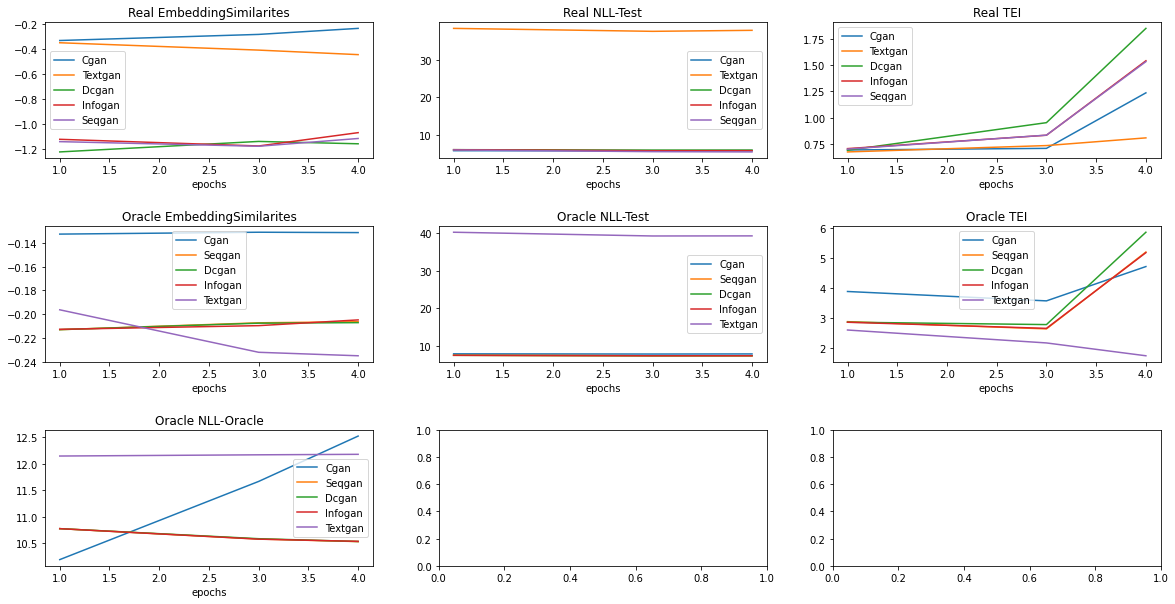

In [5]:
vis.display_metrics()

### Observations
The graphs above help visualize the performances of the various GAN models with both oracle and real training. Each of our 3 models seemed to perform much better than TextGan in the NLL-Test with both Oracle and real training, as well as under the Embedding Similarity metric with Oracle training. Another interesting note is that CGan's performance seems to improve quite a bit under adversarial training under the Embedding Similarity Metric with real training, while InfoGan and TextGan seems to perform worse in the same measure. Similarly, as the number of epochs increases, CGan's performances eclipses those of the other 4 models under the NLL measure with Oracle training. Of course, these metrics are only measured across 5 epochs, so it'd be helpful to see how the models perform given more time. But we can still use this information to get a better understanding of each model's performance.

## Notes
 This project was a collaborative effort by all team members listed in top of document. Project was developed/run/tested while on video call as a team effort. All parties put forth equal effort in testing, data selection and stripping, as well as understanding content.

 >**Note:** please refer to Team Project Documentation\MileStone3\Stephanie_Jackson_Ravjot_CIS700_M3_Contribution.txt for more contribution details

Given the short duration of setup, running, etc there was not sufficient time to truly understand each of the models under the project. Two models from the previous milestone were used as the benchmark for comparison with the three newly incorporated models added with this milestone. However more time would be require for all encompassing tasking to really dive in and understand these models, and to run over longer epochs to see more concrete data results and comparisons. Additionally it should be noted the amount of time it takes to run these models with higher epoch values. Running the full models over and over can help training, however can take hours to complete. Furthermore, the .csv files were not populating. Given more time dedicate to this project, issues may have been able to be resolved

##Reference
[1] Geek-Ai. “Texygen by Geek.AI.” GitHub, 2017, github.com/geek-ai/Texygen.

[2] Yu, Lantao, et al. “SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient.” ArXiv.org, 25 Aug. 2017, arxiv.org/abs/1609.05473.

[3] Zhang, Yizhe, et al. “Adversarial Feature Matching for Text Generation.” ArXiv.org, 18 Nov. 2017, arxiv.org/abs/1706.03850.

[4] Chen, Xi, Duan, Yan, Houthooft, Rein, Schulman, John,
Sutskever, Ilya, and Abbeel, Pieter. Infogan: Interpretable representation learning by information maximizing generative adversarial nets. arXiv preprint
arXiv:1606.03657, 2016a.

[5] EA Poem Source.  https://poestories.com/read/valentine

[6] Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
https://arxiv.org/abs/1511.06434

In [ ]:
#PDF/HTML conversion of notebook
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --output-dir='results/' --to PDF "milestone3.ipynb"
!jupyter nbconvert --output-dir='results/' --to HTML "milestone3.ipynb"

In [ ]:
#Download results/midterm dir
!zip -r results.zip results/
from google.colab import files
files.download("results.zip")